## Feature Engineering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ift6758.features.feature_engineering1 import SeasonDataSet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import random
import pandas as pd


In [3]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
seed = 42
seed_everything(seed)

In [4]:
train_years = [2015,2016,2017,2018]
test_years=[2019]

In [5]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


In [6]:
train_df

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0,34.525353,10.007980
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,10.000000,0.000000
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,14.035669,-4.085617
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0,49.517674,-46.636577
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0,28.017851,-2.045408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,Goal,2018030417,St. Louis Blues,3,15:22,REGULAR,04:38,-77.0,7.0,Snap Shot,0,Even,Zach Sanford,Tuukka Rask,"(-89, 0)",1,13.892444,30.256437
332738,Shot,2018030417,St. Louis Blues,3,15:51,REGULAR,04:09,-69.0,7.0,Snap Shot,0,NaN,Alexander Steen,Tuukka Rask,"(-89, 0)",0,21.189620,19.290046
332739,Shot,2018030417,St. Louis Blues,3,15:55,REGULAR,04:05,-65.0,-4.0,Snap Shot,0,NaN,Ryan O'Reilly,Tuukka Rask,"(-89, 0)",0,24.331050,-9.462322
332740,Shot,2018030417,Boston Bruins,3,16:50,REGULAR,03:10,42.0,3.0,Wrist Shot,0,NaN,Marcus Johansson,Jordan Binnington,"(89, 0)",0,47.095647,-3.652223


In [7]:
train_df[(train_df['gamePk']==2018020722)&(train_df['result.event']=='Goal')]

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
292219,Goal,2018020722,Boston Bruins,1,04:39,REGULAR,15:21,-85.0,-22.0,Snap Shot,0,Power Play,David Pastrnak,Carter Hart,"(89, 0)",1,175.385290,7.206057
292226,Goal,2018020722,Boston Bruins,1,09:12,REGULAR,10:48,67.0,-16.0,Snap Shot,0,Even,Peter Cehlarik,Carter Hart,"(89, 0)",1,27.202941,36.027373
292229,Goal,2018020722,Philadelphia Flyers,1,12:44,REGULAR,07:16,-67.0,-12.0,Snap Shot,0,Even,Oskar Lindblom,Jaroslav Halak,"(-89, 0)",1,25.059928,-28.610460
292237,Goal,2018020722,Philadelphia Flyers,2,05:32,REGULAR,14:28,74.0,-12.0,Tip-In,0,Even,Sean Couturier,Jaroslav Halak,"(89, 0)",1,19.209373,38.659808
292241,Goal,2018020722,Philadelphia Flyers,2,06:47,REGULAR,13:13,-32.0,-6.0,Tip-In,0,Power Play,Sean Couturier,Jaroslav Halak,"(89, 0)",1,121.148669,2.838788
292272,Goal,2018020722,Philadelphia Flyers,3,15:53,REGULAR,04:07,-65.0,-18.0,Snap Shot,0,Even,Sean Couturier,Jaroslav Halak,"(-89, 0)",1,30.000000,-36.869898
292274,Goal,2018020722,Boston Bruins,3,18:54,REGULAR,01:06,78.0,7.0,Tip-In,0,Even,Peter Cehlarik,Carter Hart,"(89, 0)",1,13.038405,-32.471192


In [8]:
train_df[(train_df['distanceNet']>150)&(train_df['result.event']=='Goal')&(train_df['about.period']<3)]

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
19,Goal,2015020001,Toronto Maple Leafs,2,00:19,REGULAR,19:41,-73.0,-1.0,Deflected,0,Power Play,James van Riemsdyk,Carey Price,"(89, 0)",1,162.003086,0.353673
707,Goal,2015020013,New York Rangers,1,19:16,REGULAR,00:44,69.0,8.0,Backhand,0,Even,Mats Zuccarello,Sergei Bobrovsky,"(-89, 0)",1,158.202402,2.898577
721,Goal,2015020013,Columbus Blue Jackets,2,10:59,REGULAR,09:01,77.0,-7.0,Wrist Shot,0,Even,Cam Atkinson,Henrik Lundqvist,"(-89, 0)",1,166.147525,-2.414657
812,Goal,2015020015,Chicago Blackhawks,1,13:28,REGULAR,06:32,76.0,-3.0,Backhand,0,Short Handed,Artem Anisimov,Thomas Greiss,"(-89, 0)",1,165.027270,-1.041627
823,Goal,2015020015,New York Islanders,2,05:22,REGULAR,14:38,79.0,3.0,Wrist Shot,0,Even,John Tavares,Corey Crawford,"(-89, 0)",1,168.026784,1.023030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281884,Goal,2018020555,Arizona Coyotes,1,19:55,REGULAR,00:05,-85.0,32.0,Wrist Shot,0,Even,Derek Stepan,Philipp Grubauer,"(89, 0)",1,176.918060,-10.420712
284815,Goal,2018020601,New York Islanders,2,02:59,REGULAR,17:01,-65.0,-6.0,Deflected,0,Even,Leo Komarov,Carter Hutton,"(89, 0)",1,154.116839,2.231175
292219,Goal,2018020722,Boston Bruins,1,04:39,REGULAR,15:21,-85.0,-22.0,Snap Shot,0,Power Play,David Pastrnak,Carter Hart,"(89, 0)",1,175.385290,7.206057
307010,Goal,2018020953,Pittsburgh Penguins,1,07:59,REGULAR,12:01,-82.0,2.0,Backhand,0,Even,Sidney Crosby,Brian Elliott,"(89, 0)",1,171.011696,-0.670096


In [9]:
train_df = train_df[train_df['gamePk'].astype(str).str[5]=='2']
train_df

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0,34.525353,10.007980
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,10.000000,0.000000
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,14.035669,-4.085617
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0,49.517674,-46.636577
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0,28.017851,-2.045408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327276,Shot,2018021271,San Jose Sharks,3,15:37,REGULAR,04:23,67.0,-19.0,Slap Shot,0,NaN,Joe Pavelski,Semyon Varlamov,"(89, 0)",0,29.068884,40.815084
327277,Shot,2018021271,Colorado Avalanche,3,16:33,REGULAR,03:27,-78.0,1.0,Wrist Shot,0,NaN,Gabriel Landeskog,Martin Jones,"(-89, 0)",0,11.045361,5.194429
327278,Shot,2018021271,Colorado Avalanche,3,18:39,REGULAR,01:21,-82.0,10.0,Wrist Shot,0,NaN,Gabriel Landeskog,Martin Jones,"(-89, 0)",0,12.206556,55.007980
327279,Shot,2018021271,Colorado Avalanche,3,18:40,REGULAR,01:20,-81.0,1.0,Wrist Shot,0,NaN,Carl Soderberg,Martin Jones,"(-89, 0)",0,8.062258,7.125016


In [10]:
df_features_y = train_df[["distanceNet", "angleNet", "result.emptyNet", "result.event"]]
df_features_y

,distanceNet,angleNet,result.emptyNet,result.event
0,34.525353,10.007980,0,Shot
1,10.000000,0.000000,0,Shot
2,14.035669,-4.085617,0,Shot
3,49.517674,-46.636577,0,Shot
4,28.017851,-2.045408,0,Shot
...,...,...,...,...
327276,29.068884,40.815084,0,Shot
327277,11.045361,5.194429,0,Shot
327278,12.206556,55.007980,0,Shot
327279,8.062258,7.125016,0,Shot


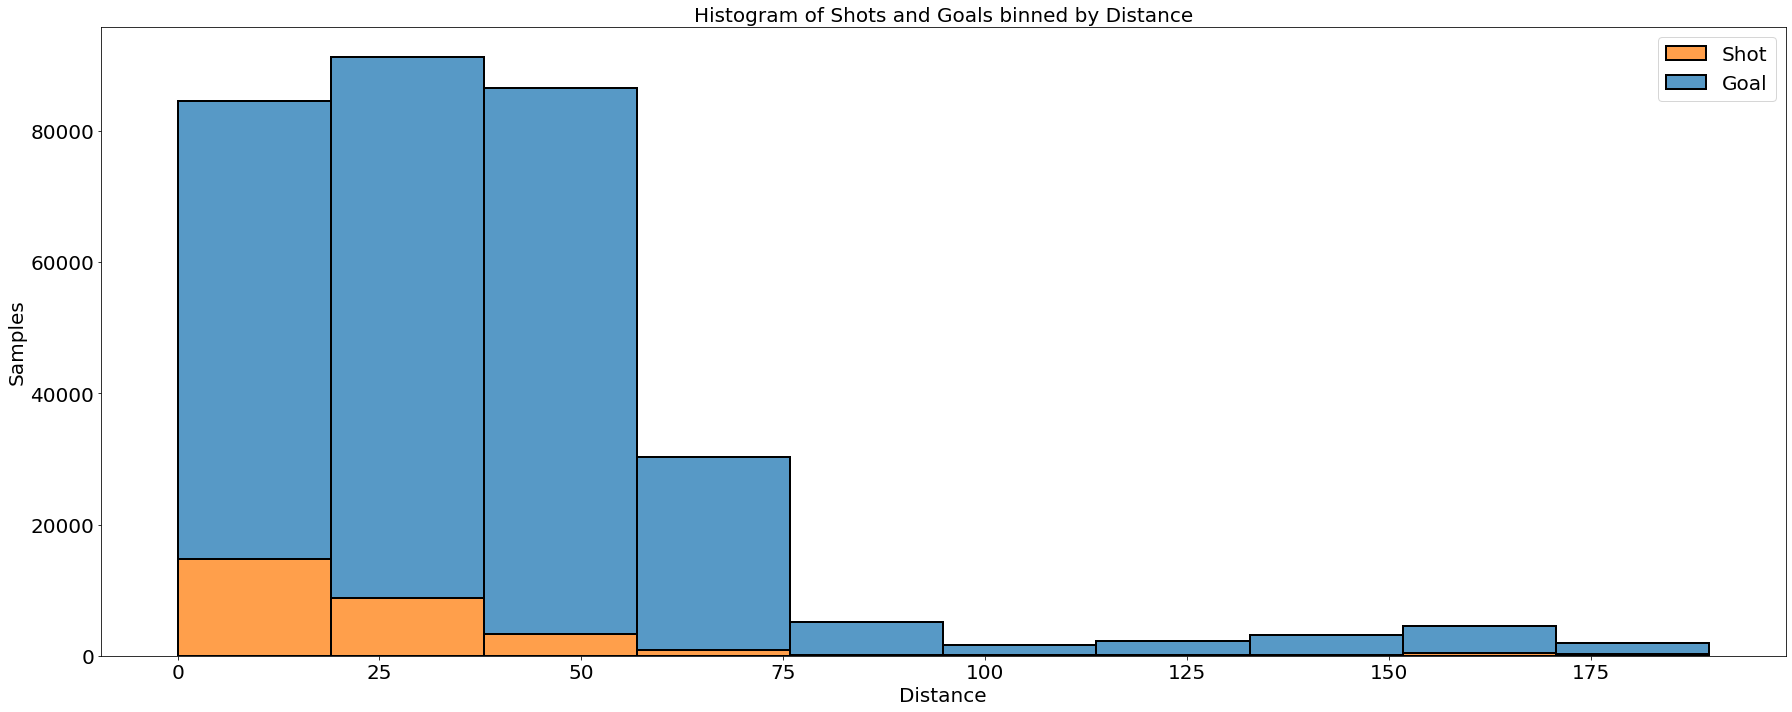

In [11]:
fig, ax = plt.subplots(figsize=(25,10))
sns.histplot(data=df_features_y, x="distanceNet", hue="result.event", multiple="stack", bins=10, edgecolor='black', linewidth=2)
ax.tick_params(axis='both', which='both', labelsize=20)
plt.title('Histogram of Shots and Goals binned by Distance', fontsize=20)
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Samples', fontsize=20)
plt.legend(['Shot','Goal'], fontsize=20)
plt.tight_layout()

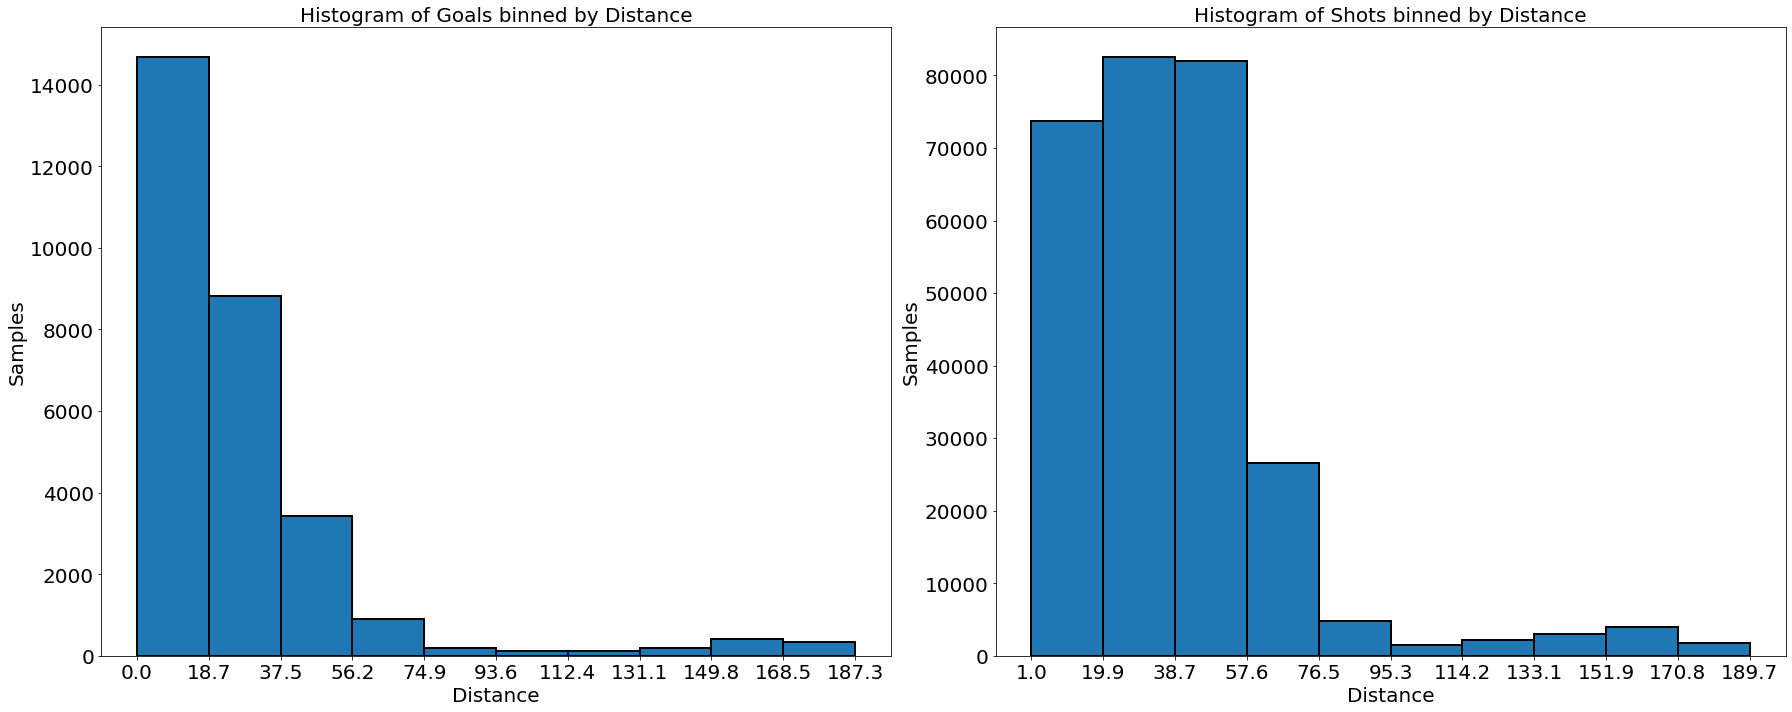

In [12]:
df1 = df_features_y[df_features_y['result.event'] == 'Goal']
df2 = df_features_y[df_features_y['result.event'] == 'Shot']
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10))
n, bins, edges = ax1.hist(df1.distanceNet, bins=10, edgecolor='black', linewidth=2)
ax1.tick_params(axis='both', which='both', labelsize=20)
ax1.set_xticks(bins)
ax1.set_xlabel('Distance', fontsize=20)
ax1.set_ylabel('Samples', fontsize=20)
ax1.set_title('Histogram of Goals binned by Distance', fontsize=20)

n, bins, edges = ax2.hist(df2.distanceNet, bins=10, edgecolor='black', linewidth=2)
ax2.tick_params(axis='both', which='both', labelsize=20)
ax2.set_xticks(bins)
ax2.set_xlabel('Distance', fontsize=20)
ax2.set_ylabel('Samples', fontsize=20)
ax2.set_title('Histogram of Shots binned by Distance', fontsize=20)

plt.tight_layout()

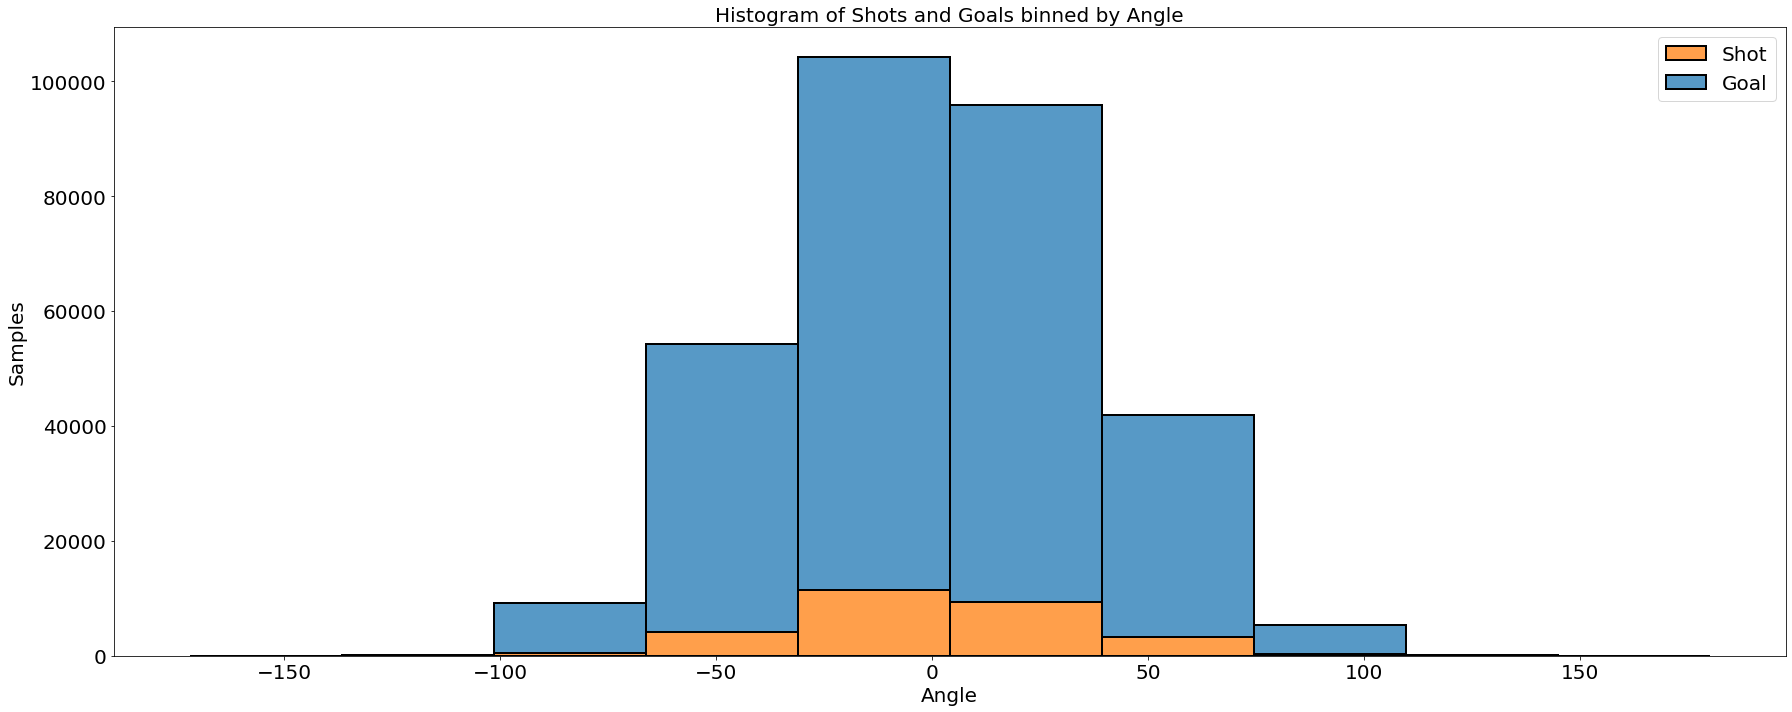

In [13]:
fig, ax = plt.subplots(figsize=(25,10))
sns.histplot(data=df_features_y, x="angleNet", hue="result.event", multiple="stack", bins=10, edgecolor='black', linewidth=2)
ax.tick_params(axis='both', which='both', labelsize=20)
plt.title('Histogram of Shots and Goals binned by Angle', fontsize=20)
plt.xlabel('Angle', fontsize=20)
plt.ylabel('Samples', fontsize=20)
plt.legend(['Shot','Goal'], fontsize=20)
plt.tight_layout()

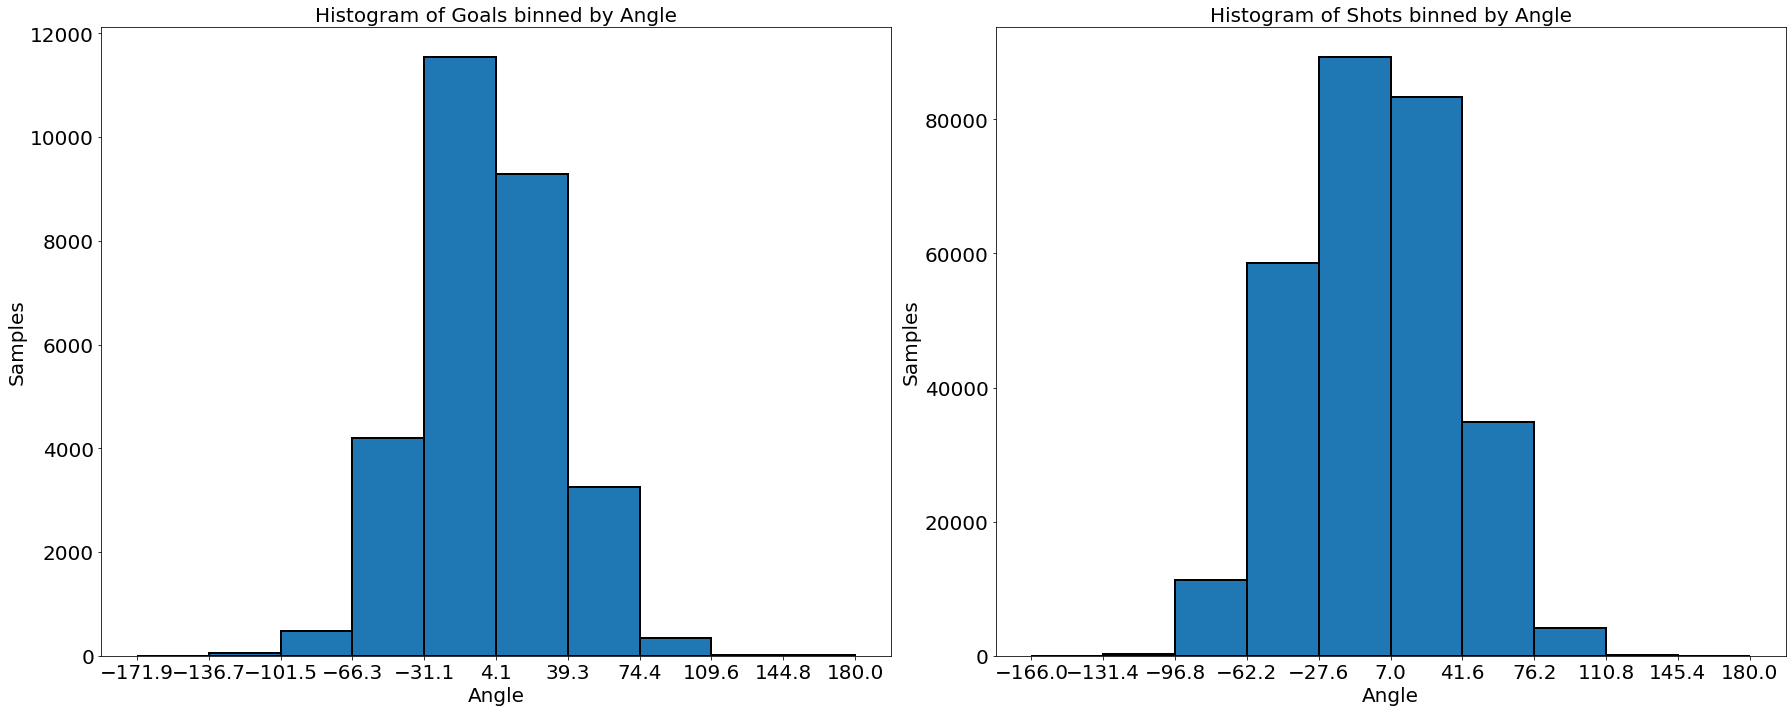

In [14]:
df1 = df_features_y[df_features_y['result.event'] == 'Goal']
df2 = df_features_y[df_features_y['result.event'] == 'Shot']
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10))
n, bins, edges = ax1.hist(df1.angleNet, bins=10, edgecolor='black', linewidth=2)
ax1.tick_params(axis='both', which='both', labelsize=20)
ax1.set_xticks(bins)
ax1.set_xlabel('Angle', fontsize=20)
ax1.set_ylabel('Samples', fontsize=20)
ax1.set_title('Histogram of Goals binned by Angle', fontsize=20)

n, bins, edges = ax2.hist(df2.angleNet, bins=10, edgecolor='black', linewidth=2)
ax2.tick_params(axis='both', which='both', labelsize=20)
ax2.set_xticks(bins)
ax2.set_xlabel('Angle', fontsize=20)
ax2.set_ylabel('Samples', fontsize=20)
ax2.set_title('Histogram of Shots binned by Angle', fontsize=20)

plt.tight_layout()

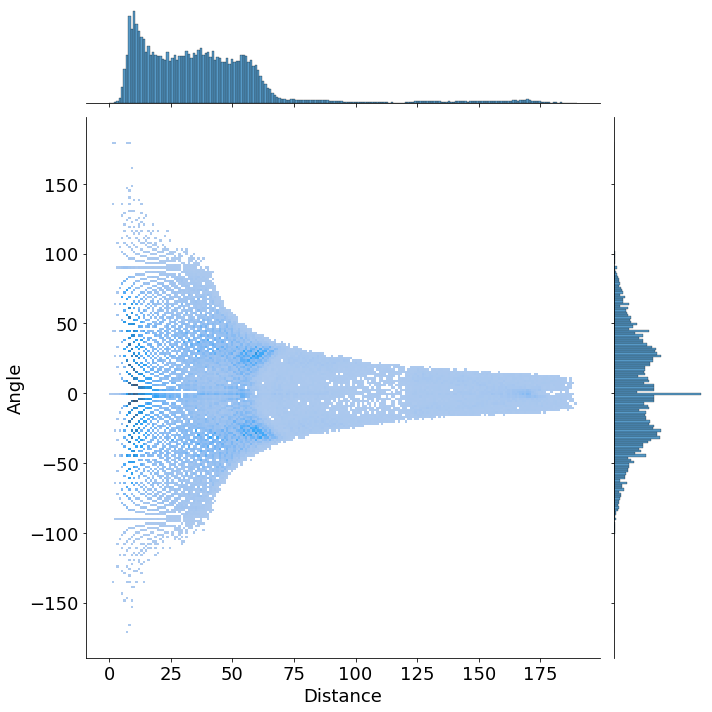

In [24]:
h = sns.jointplot(x=df_features_y['distanceNet'], y=df_features_y['angleNet'], kind="hist", height=10)
# h.set_title("LaLaLa")
h.set_axis_labels('Distance', 'Angle', fontsize=18)
h.ax_joint.tick_params(axis='both', which='both', labelsize=18)
plt.tight_layout()

In [25]:
goal_rate = []
for i in range (0, 190, 10):
    df_temp = df_features_y[ (df_features_y.distanceNet >=i) & (df_features_y.distanceNet <(i+10))]
    df_temp['count'] = df_temp['result.event']
    df_temp = df_temp[['result.event','count']]
    df_temp= df_temp.groupby(['result.event'], as_index=False ).count()
    goal_rate.append(df_temp._get_value(0,'count') / (df_temp._get_value(0,'count') + df_temp._get_value(1,'count')))

C:\Users\saiak\AppData\Local\Temp/ipykernel_11148/2537613211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['count'] = df_temp['result.event']


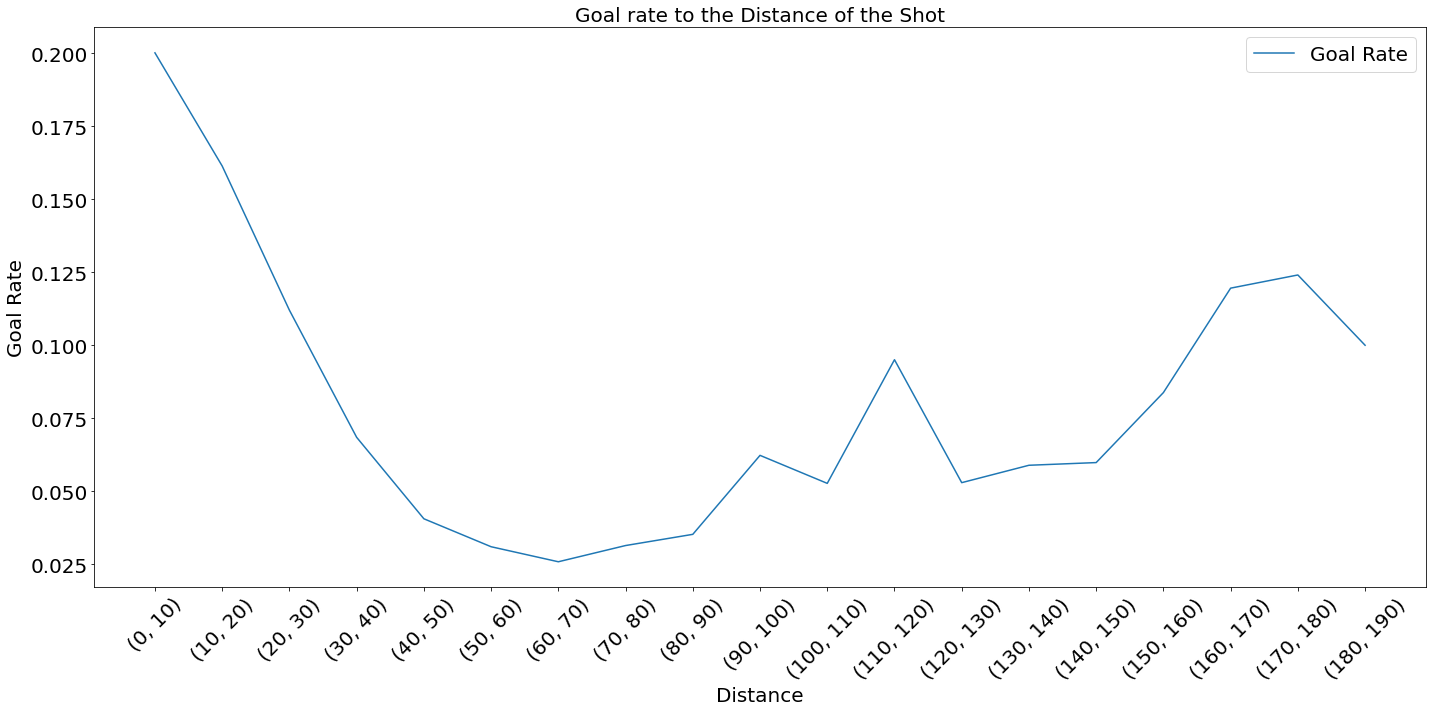

In [26]:
distance = [(i, i+10) for i in range (0, 190, 10)]
plt.figure(figsize=(20,10))
plt.plot([str(d) for d in distance], goal_rate, label='Goal Rate') 
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Goal Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Goal rate to the Distance of the Shot', fontsize=20)
plt.tight_layout()

In [27]:
goal_rate = []
for i in range (-100, 100, 10):
    df_temp = df_features_y[ (df_features_y.angleNet >=i) & (df_features_y.angleNet <(i+10))]
    df_temp['count'] = df_temp['result.event']
    df_temp = df_temp[['result.event','count']]
    df_temp= df_temp.groupby(['result.event'], as_index=False ).count()
    goal_rate.append(df_temp._get_value(0,'count') / (df_temp._get_value(0,'count') + df_temp._get_value(1,'count')))

C:\Users\saiak\AppData\Local\Temp/ipykernel_11148/163922214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['count'] = df_temp['result.event']


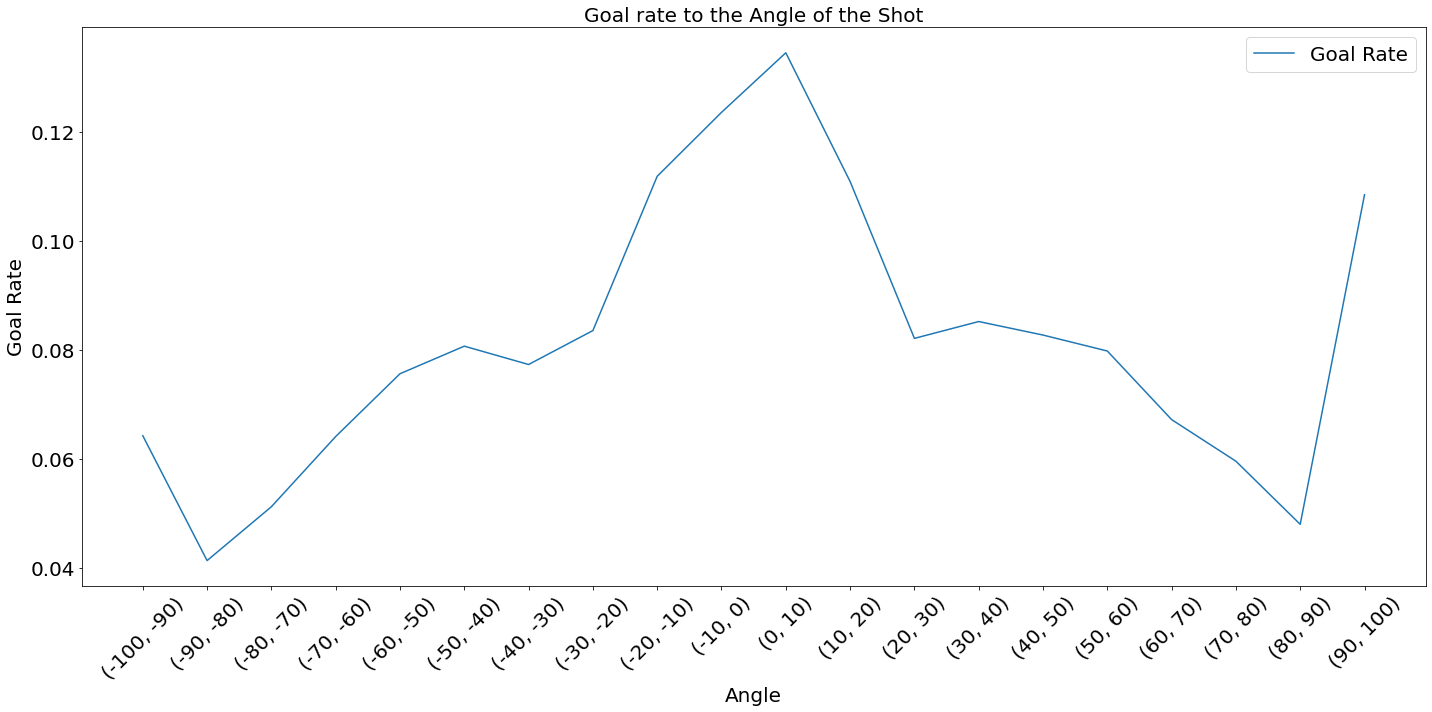

In [28]:
angle = [(i, i+10) for i in range (-100,100 ,10)]
plt.figure(figsize=(20,10))
plt.plot([str(a) for a in angle], goal_rate, label='Goal Rate') 
plt.xlabel('Angle', fontsize=20)
plt.ylabel('Goal Rate', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Goal rate to the Angle of the Shot', fontsize=20)
plt.tight_layout()

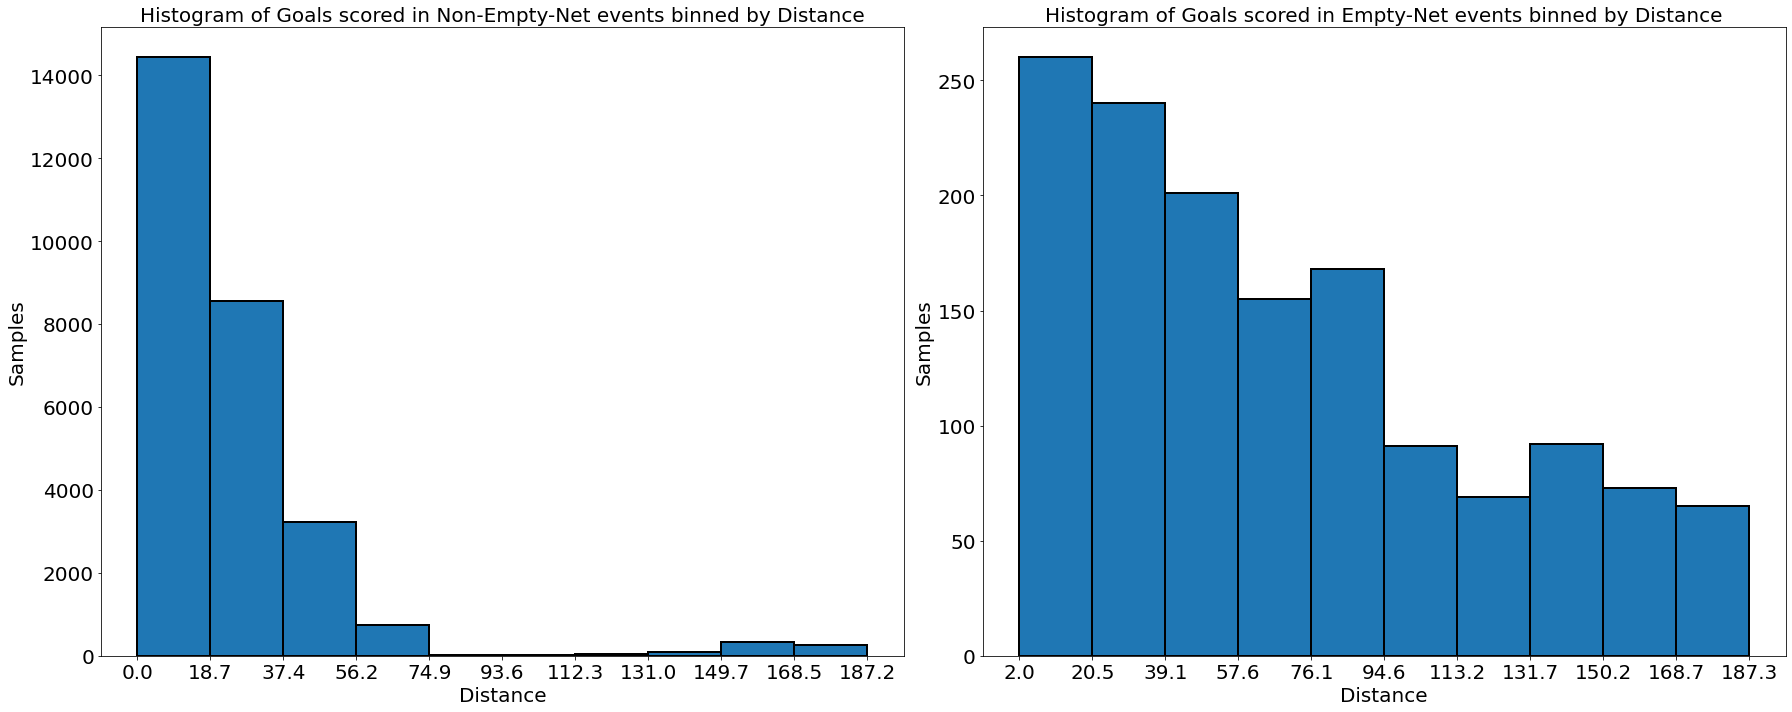

In [29]:
df = df_features_y[df_features_y['result.event'] == 'Goal']
df1 = df[df['result.emptyNet'] == 0]
df2 = df[df['result.emptyNet'] == 1]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25,10))
n, bins, edges = ax1.hist(df1.distanceNet, bins=10, edgecolor='black', linewidth=2)
ax1.tick_params(axis='both', which='both', labelsize=20)
ax1.set_xticks(bins)
ax1.set_xlabel('Distance', fontsize=20)
ax1.set_ylabel('Samples', fontsize=20)
ax1.set_title('Histogram of Goals scored in Non-Empty-Net events binned by Distance', fontsize=20)

n, bins, edges = ax2.hist(df2.distanceNet, bins=10, edgecolor='black', linewidth=2)
ax2.tick_params(axis='both', which='both', labelsize=20)
ax2.set_xticks(bins)
ax2.set_xlabel('Distance', fontsize=20)
ax2.set_ylabel('Samples', fontsize=20)
ax2.set_title('Histogram of Goals scored in Empty-Net events binned by Distance', fontsize=20)

plt.tight_layout()

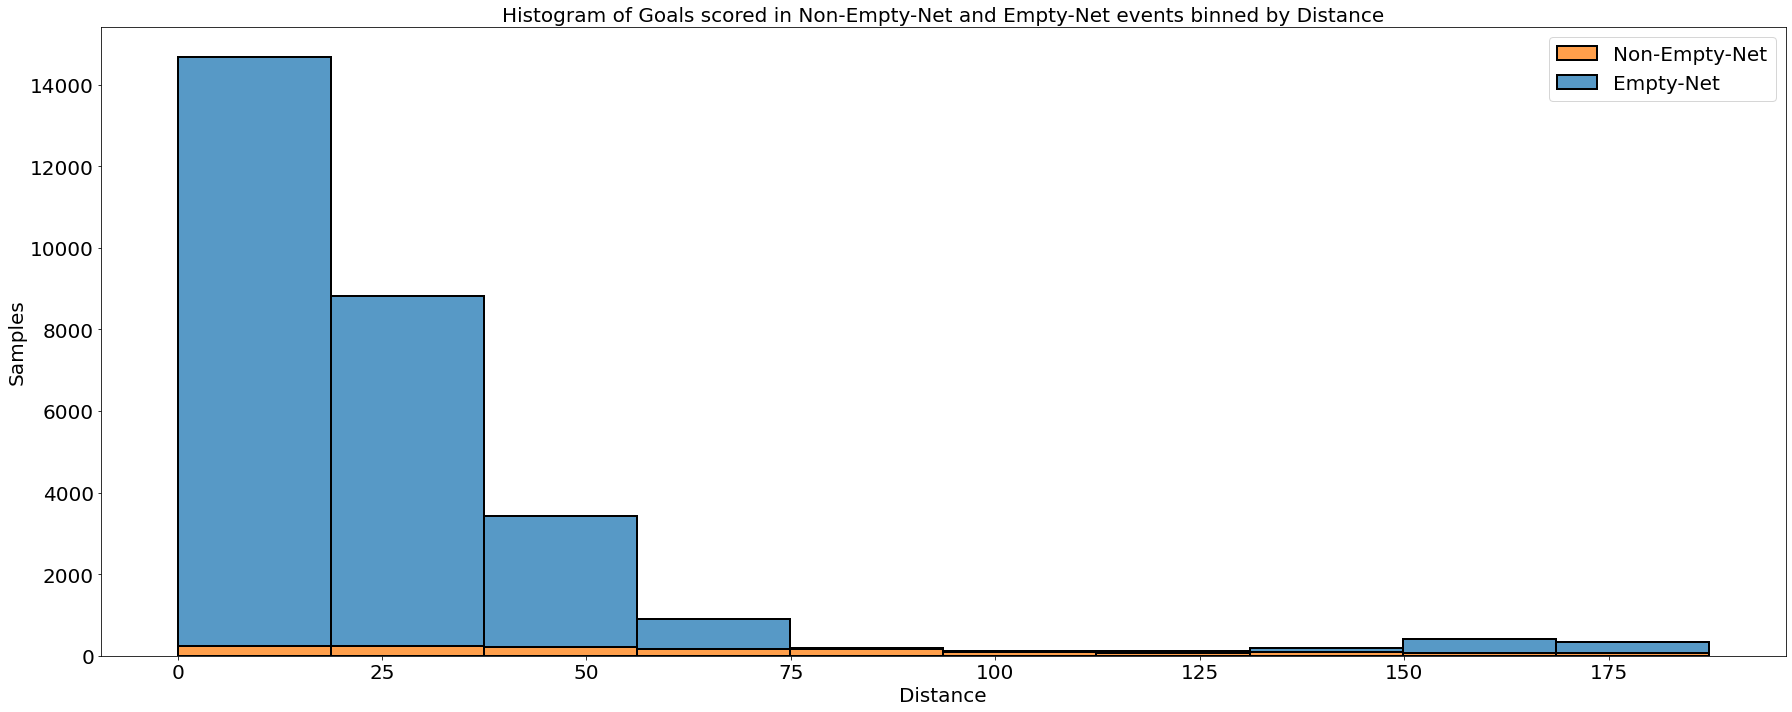

In [30]:
fig, ax = plt.subplots(figsize=(25,10))
sns.histplot(data=df, x="distanceNet", hue="result.emptyNet", multiple="stack", bins=10, edgecolor='black', linewidth=2)
ax.tick_params(axis='both', which='both', labelsize=20)
plt.title('Histogram of Goals scored in Non-Empty-Net and Empty-Net events binned by Distance', fontsize=20)
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Samples', fontsize=20)
plt.legend(['Non-Empty-Net','Empty-Net'], fontsize=20)
plt.tight_layout()